In [6]:
# Alle folgenden imports sind nötig!

import matplotlib.pyplot as plt
import numpy as np
import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [11]:
# Trainingsdatenset und Bewertungsdatenset erstellen

img_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)
batch_size = 32
target_size =(300, 300)
train_ds = img_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='images/archive/bloodcells_dataset',
                                                 target_size=target_size,  
                                                 subset="training",
                                                 class_mode='categorical',
                                                 shuffle=True, # mischen von Daten, verhindert das Lernen von Reihenfolge
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                 )

validation_ds = img_generator.flow_from_directory(batch_size=batch_size,
                                                 directory='images/archive/bloodcells_dataset',
                                                 target_size=target_size, 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                )


Found 11967 images belonging to 8 classes.
Found 5125 images belonging to 8 classes.


In [12]:
# Dictionary um den Zelltyp mit argmax festzuhalten
agx_to_string = {
                     0: 'basophil',
                     1: 'eosinophil',
                     2: 'erythroblast',
                     3: 'immunoglobulin',
                     4: 'lymphocyte',
                     5: 'monocyte',
                     6: 'neutrophil',
                     7: 'platelet'
                   }




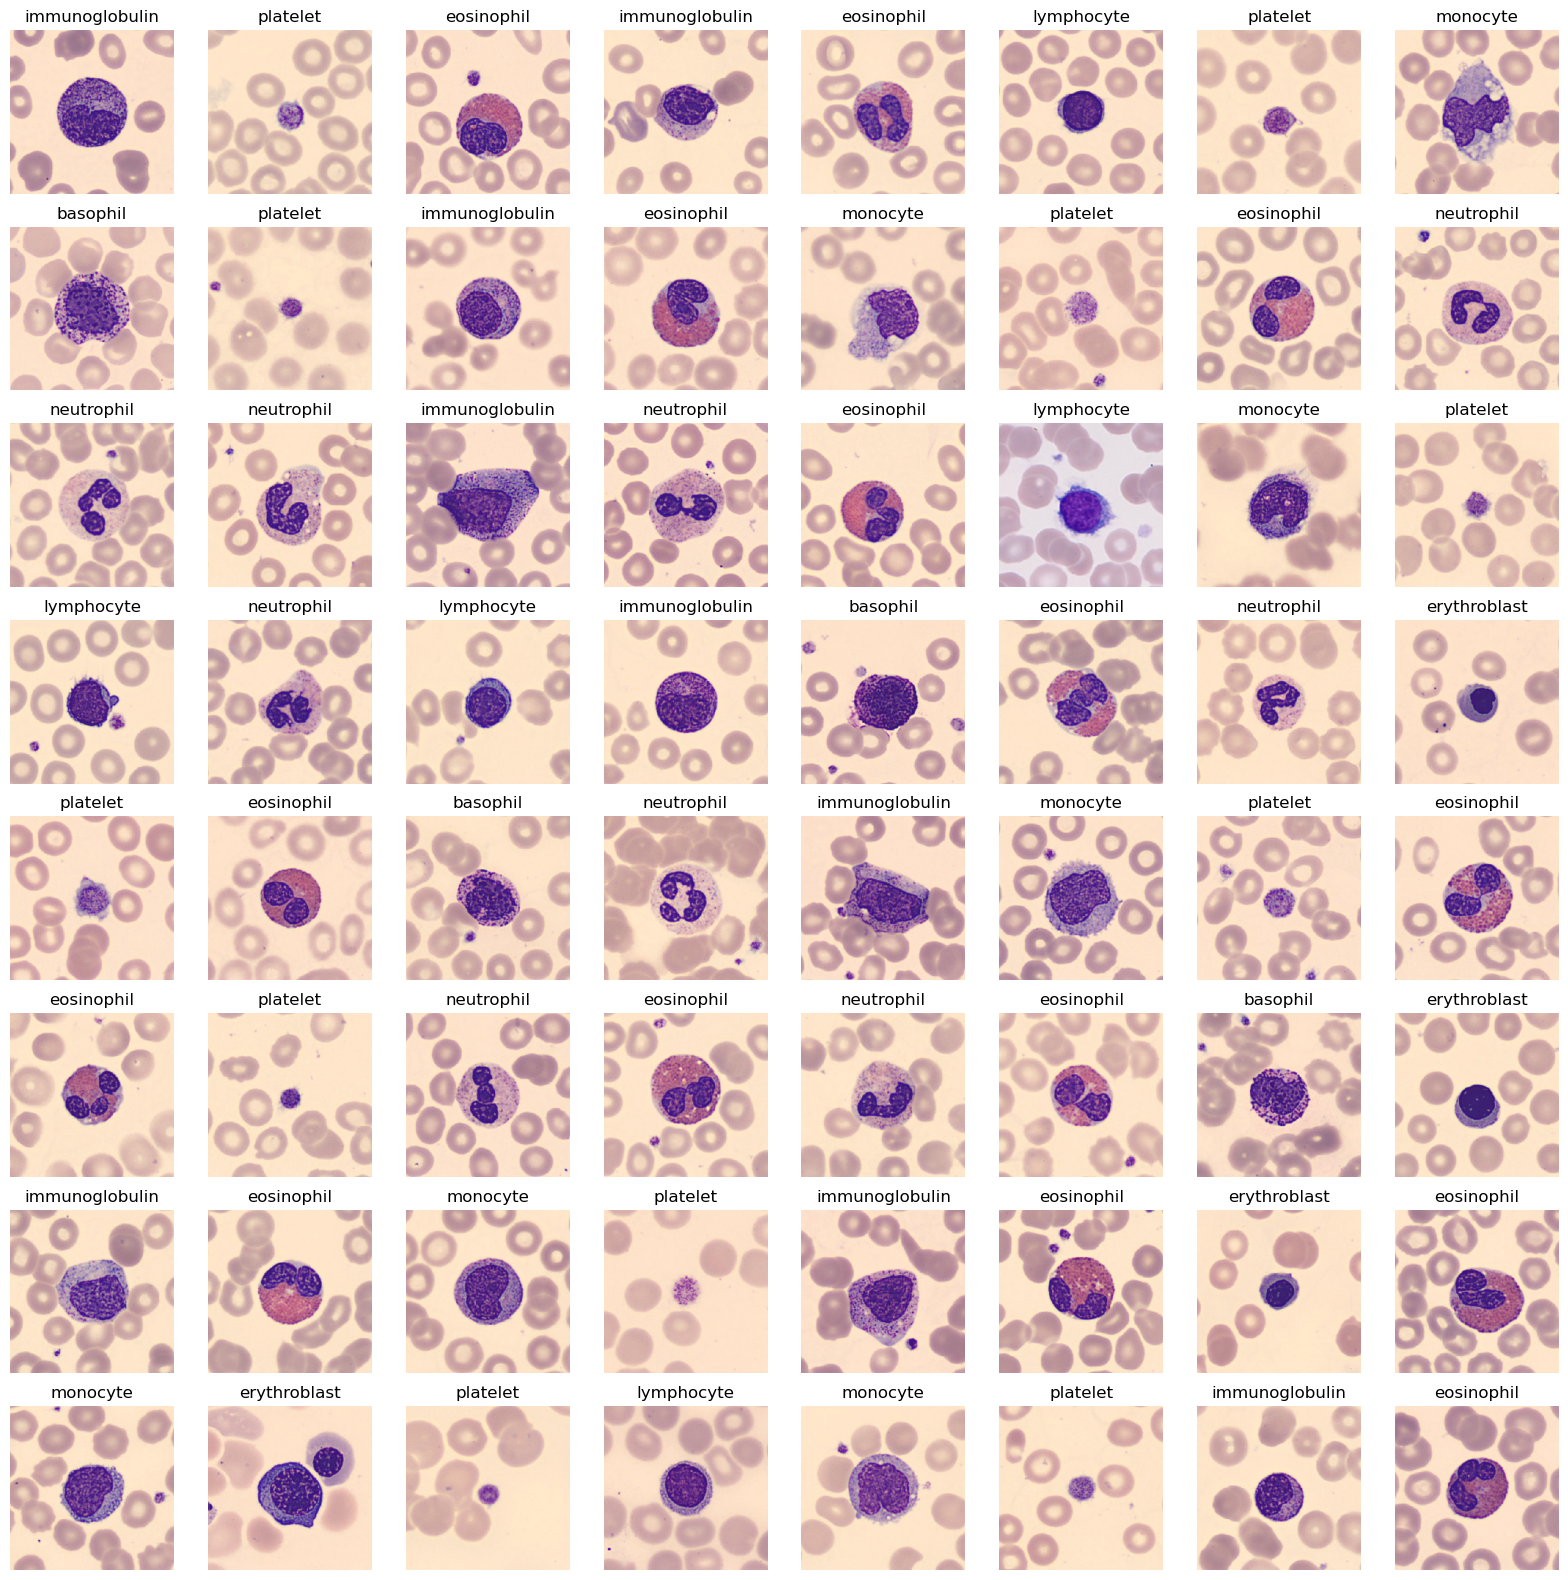

In [13]:
# Daten zeigen
plt.figure(figsize=(20, 20))
plot_dim = 8
counter = 1

for img in train_ds:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # nur ein Bild von (plot_dim²) pro Durchgang
    plt.title(agx_to_string[np.argmax(img[-1])])
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1

In [21]:
# Deep Learning Modell mit keras erstellen

model = keras.models.Sequential()
model.add(keras.Input(shape=(300, 300, 3)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2, padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Model Summary ausgeben
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 150, 150, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 720000)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               184320256 
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                      

In [24]:
# Modell trainieren (12 Iterationen)
model.fit(train_ds, epochs=6, validation_data=validation_ds)

Epoch 1/6
374/374 [==============================] - 717s 2s/step - loss: 1.0278 - accuracy: 0.6561 - val_loss: 0.6613 - val_accuracy: 0.7887
Epoch 2/6
374/374 [==============================] - 730s 2s/step - loss: 0.4138 - accuracy: 0.8607 - val_loss: 0.5215 - val_accuracy: 0.8197
Epoch 3/6
374/374 [==============================] - 774s 2s/step - loss: 0.2540 - accuracy: 0.9158 - val_loss: 0.5386 - val_accuracy: 0.8363
Epoch 4/6
374/374 [==============================] - 773s 2s/step - loss: 0.1528 - accuracy: 0.9521 - val_loss: 0.5836 - val_accuracy: 0.8248
Epoch 5/6
374/374 [==============================] - 734s 2s/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.4468 - val_accuracy: 0.8628
Epoch 6/6
374/374 [==============================] - 719s 2s/step - loss: 0.0743 - accuracy: 0.9775 - val_loss: 0.6140 - val_accuracy: 0.8195


In [25]:
# Minimale und maximale Werte vom Training

min_loss_train = min(model.history.history['loss'])
min_loss_val = min(model.history.history['val_loss'])
                
max_acc_train = max(model.history.history['accuracy'])
max_acc_val = max(model.history.history['val_accuracy'])


print('Minimaler Verlustwert aus dem Trainingsdatensatz: ', round(min_loss_train, 4))
print('Minimaler Verlustwert aus dem Validierungsdatensatz: ', round(min_loss_val, 4))
print()
print('Maximale Genauigkeit des Trainingsdatensatzes: ', round(max_acc_train*100, 2), '%')
print('Maximale Genauigkeit des Validierungsdatensatzes: ', round(max_acc_val*100, 2), '%')

Minimaler Verlustwert aus dem Trainingsdatensatz:  0.0743
Minimaler Verlustwert aus dem Validierungsdatensatz:  0.4468

Maximale Genauigkeit des Trainingsdatensatzes:  97.75 %
Maximale Genauigkeit des Validierungsdatensatzes:  86.28 %


Text(0, 0.5, 'Verlust function value')

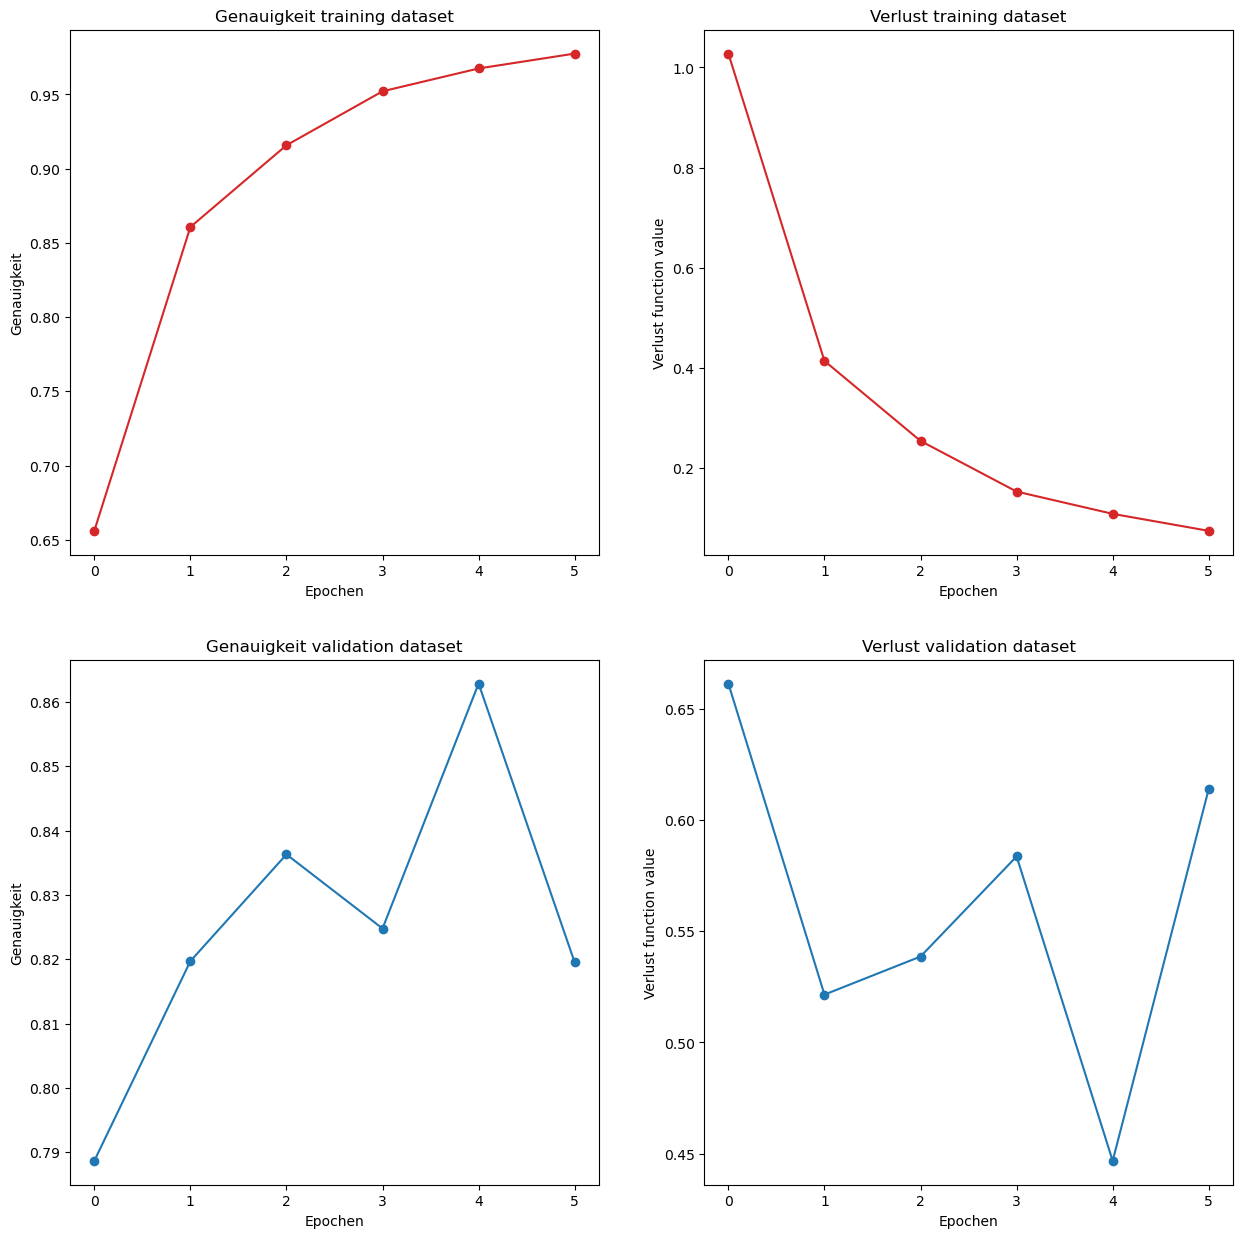

In [26]:
# Entwicklung des Trainings

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['accuracy'], color='tab:red', marker='o')
plt.title('Genauigkeit training dataset')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['loss'], color='tab:red', marker='o')
plt.title('Verlust training dataset')
plt.xlabel('Epochen')
plt.ylabel('Verlust function value')

plt.subplot(2, 2, 3)
plt.plot(model.history.history['val_accuracy'], color='tab:blue', marker='o')
plt.title('Genauigkeit validation dataset')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')

plt.subplot(2, 2, 4)
plt.plot(model.history.history['val_loss'], color='tab:blue', marker='o')
plt.title('Verlust validation dataset')
plt.xlabel('Epochen')
plt.ylabel('Verlust function value')

1/1 [==============================] - 0s 200ms/step


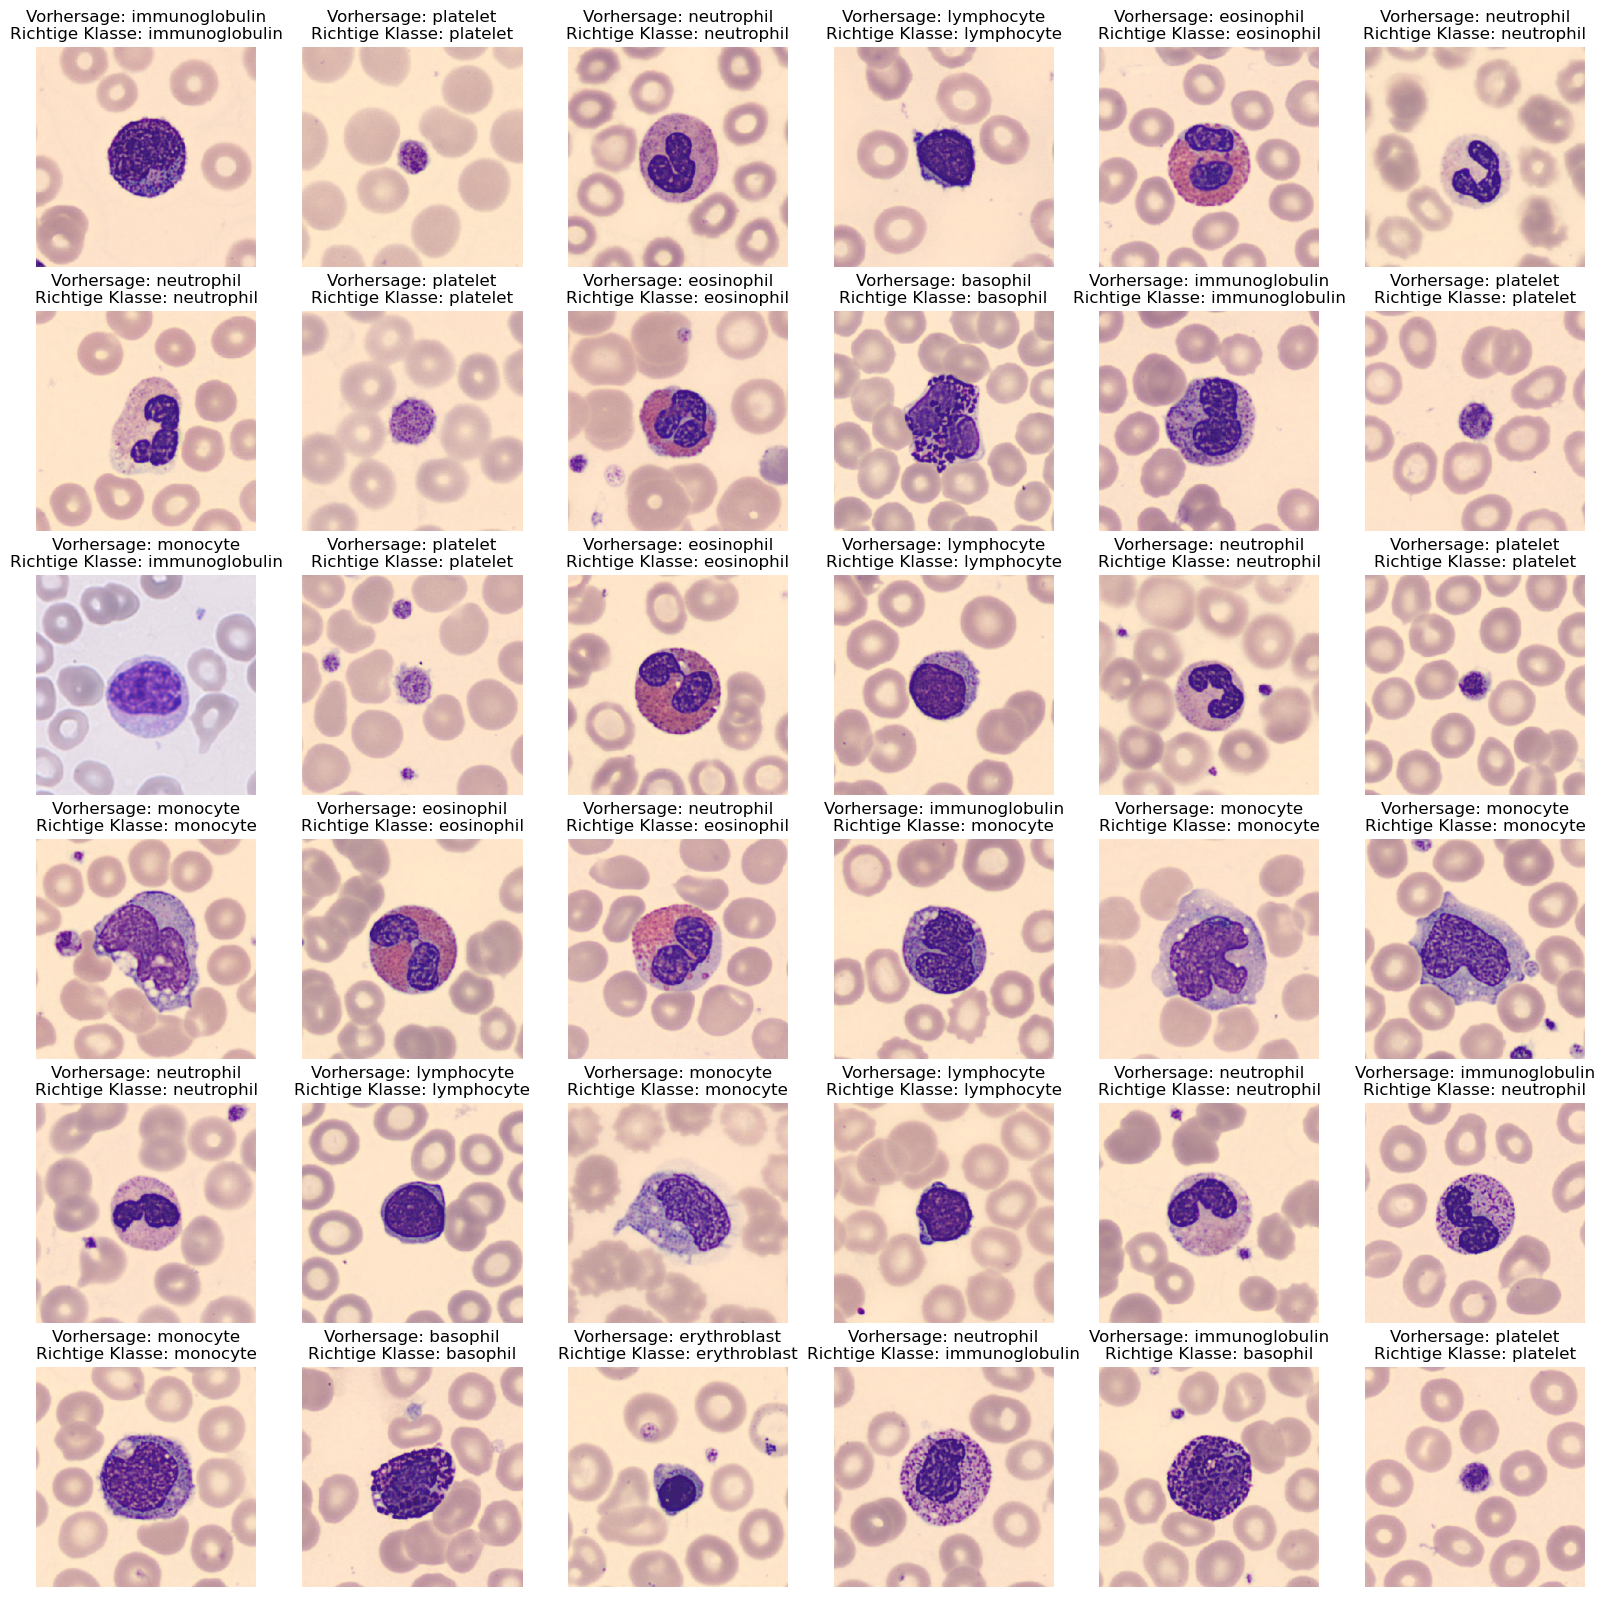

In [28]:
# Resultate anzeigen

plt.figure(figsize=(20, 20))
plot_dim = 6
counter = 1

for img in validation_ds:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # only one image of (plot_dim*plot_dim)th firsts batches
    predict = agx_to_string[np.argmax(model.predict(img[0])[0])]
    real_class = agx_to_string[np.argmax(img[-1])]

    plt.title(f'Vorhersage: {predict}\nRichtige Klasse: {real_class}')
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1